In [192]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [193]:
data=pd.read_csv(r"EmployeeBurnout1.csv")
df = pd.DataFrame(data)
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52


In [194]:
df.shape

(22750, 9)

In [195]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [197]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [198]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'],errors='coerce')

In [199]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [200]:
df["Resource Allocation"].fillna(df["Resource Allocation"].median(), inplace=True)
df["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].median(), inplace=True)



In [201]:
df.dropna(inplace=True)

In [202]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [203]:
df.drop('Employee ID' ,axis=1,inplace=True)


In [204]:
df.duplicated().sum()

9

In [205]:
df.drop_duplicates(inplace=True)

In [206]:
df.duplicated().sum()

0

In [207]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
len(object_cols))

Categorical variables:
['Gender', 'Company Type', 'WFH Setup Available']
No. of. categorical features:  3


In [208]:
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [209]:
# Convert 'Date of Joining' to string
df['Date of Joining'] = df['Date of Joining'].astype(str)

# Split 'Date of Joining' into 'Year', 'Month', and 'Day' columns
df[['Year', 'Month', 'Day']] = df['Date of Joining'].str.split('-', expand=True)
df.drop('Date of Joining' ,axis=1,inplace=True)

In [210]:
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,Month,Day
0,0,1,0,2,3.0,3.8,0.16,2008,09,30
1,1,1,1,1,2.0,5.0,0.36,2008,11,30
2,0,0,1,2,4.0,5.8,0.49,2008,03,10
3,1,1,1,1,1.0,2.6,0.20,2008,11,03
4,0,1,0,3,7.0,6.9,0.52,2008,07,24


In [211]:
df.nunique()

Gender                    2
Company Type              2
WFH Setup Available       2
Designation               6
Resource Allocation      10
Mental Fatigue Score    101
Burn Rate               101
Year                      1
Month                    12
Day                      31
dtype: int64

In [212]:
df.drop('Year' ,axis=1,inplace=True)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21617 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                21617 non-null  int64  
 1   Company Type          21617 non-null  int64  
 2   WFH Setup Available   21617 non-null  int64  
 3   Designation           21617 non-null  int64  
 4   Resource Allocation   21617 non-null  float64
 5   Mental Fatigue Score  21617 non-null  float64
 6   Burn Rate             21617 non-null  float64
 7   Month                 21617 non-null  int64  
 8   Day                   21617 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.2 MB


In [214]:
data_num=["Designation", "Resource Allocation", "Mental Fatigue Score", "Burn Rate", "Month", "Day"]
cor=df[data_num].corr()
cor

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month,Day
Designation,1.000000,0.851337,0.657778,0.737505,-0.000221,-0.001307
Resource Allocation,0.851337,1.000000,0.740023,0.829581,-0.000092,-0.006634
Mental Fatigue Score,0.657778,0.740023,1.000000,0.898951,0.000737,0.000857
Burn Rate,0.737505,0.829581,0.898951,1.000000,-0.000857,-0.004432
Month,-0.000221,-0.000092,0.000737,-0.000857,1.000000,0.009612
Day,-0.001307,-0.006634,0.000857,-0.004432,0.009612,1.000000


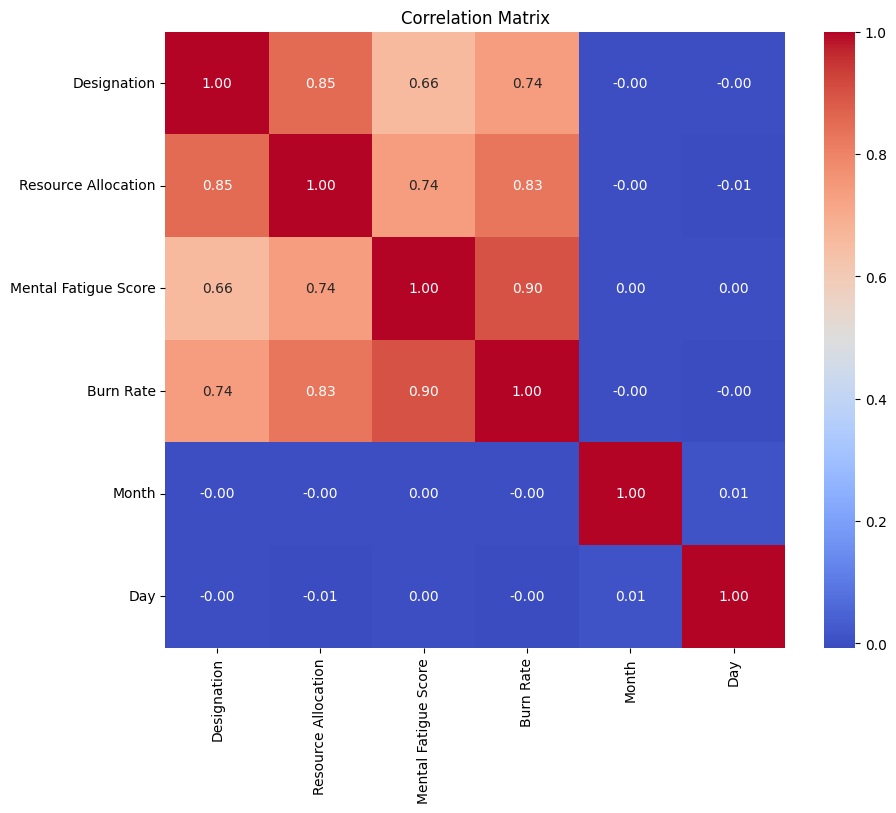

In [215]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [216]:
df.drop('Month' , axis=1, inplace=True)

In [217]:
df.drop('Day' , axis=1, inplace=True)

In [218]:
df.drop('Designation' , axis=1, inplace=True)

In [219]:
df.head()

,Gender,Company Type,WFH Setup Available,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,3.0,3.8,0.16
1,1,1,1,2.0,5.0,0.36
2,0,0,1,4.0,5.8,0.49
3,1,1,1,1.0,2.6,0.20
4,0,1,0,7.0,6.9,0.52


In [220]:
# ['Gender', 'Company Type', 'WFH Setup Available']
contingency_table = pd.crosstab(df["Gender"], df["Company Type"])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
# Print the results
print("Chi-Squared Statistic:", chi2)
print("p-value:", pval)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 2.798595076775847
p-value: 0.09434694457675483
Degrees of Freedom: 1
Expected Frequencies Table:
[[3935.96905213 7407.03094787]
 [3565.03094787 6708.96905213]]


In [221]:
# ['Gender', 'Company Type', 'WFH Setup Available']
contingency_table = pd.crosstab(df["Gender"], df["WFH Setup Available"])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
# Print the results
print("Chi-Squared Statistic:", chi2)
print("p-value:", pval)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 117.19512638097667
p-value: 2.6016993719031813e-27
Degrees of Freedom: 1
Expected Frequencies Table:
[[5212.62719156 6130.37280844]
 [4721.37280844 5552.62719156]]


In [222]:
# ['Gender', 'Company Type', 'WFH Setup Available']
contingency_table = pd.crosstab(df["Company Type"], df["WFH Setup Available"])
chi2, pval, dof, expected = chi2_contingency(contingency_table)
# Print the results
print("Chi-Squared Statistic:", chi2)
print("p-value:", pval)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 0.25023213801373506
p-value: 0.6169116693700373
Degrees of Freedom: 1
Expected Frequencies Table:
[[3447.05250497 4053.94749503]
 [6486.94749503 7629.05250497]]


In [223]:
df.drop('Company Type' ,axis=1,inplace=True)


In [224]:
X=df.drop(columns=["Burn Rate"])
y=df["Burn Rate"]

In [225]:
print(X.shape)
print(y.shape)

(21617, 4)
(21617,)


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
# Linear regression class
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute coefficients using normal equation
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coefficients)

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u / v

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_pred - y_test) ** 2)

print("Mean Squared Error:", mse)
print(f"Training Score: {lin_reg.score(X_train, y_train):.2f}")
print(f"Testing Score: {lin_reg.score(X_test, y_test):.2f}")

Mean Squared Error: 0.004975932186639282
Training Score: 0.87
Testing Score: 0.87
